## Session 5: Large Language Models Part 2

My homework can be found at the bottom of this notebook, under a dedicated section called "Homework"

In [1]:
from transformers import AutoTokenizer,AutoModelForCausalLM, AutoConfig
input_text = "My dog really wanted to"
from transformers import pipeline
generator = pipeline("text-generation", model="openai-community/gpt2")
generator(input_text, max_length=20, num_return_sequences=5)

2024-04-07 00:32:55.285503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://hugg

[{'generated_text': 'My dog really wanted to see if I\'m going to die," said his wife, Karen, 44'},
 {'generated_text': 'My dog really wanted to know what my dog was doing, so she started playing a game of ball'},
 {'generated_text': 'My dog really wanted to play on the train. As we started our journey, his owner had given'},
 {'generated_text': "My dog really wanted to sit on the bed and do a little leg press but he wasn't ready"},
 {'generated_text': 'My dog really wanted to be with me," I said. "But I couldn\'t because my dog'}]

In [2]:
!pip install accelerate -U

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
from transformers import TextDataset,DataCollatorForLanguageModeling

# Data collators are objects that will form a batch by using a list of dataset elements as input. These elements are of the same type as the elements of train_dataset or eval_dataset.

def load_dataset(train_path,test_path,tokenizer):
    train_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=train_path,
          block_size=128) 
    test_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=test_path,
          block_size=128)   
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )
    return train_dataset,test_dataset,data_collator

In [4]:
from transformers import AutoTokenizer,AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

train_dataset,test_dataset,data_collator = load_dataset('ai-science-training-series/05_llm_part2/dataset/train_input.txt','ai-science-training-series/05_llm_part2/dataset/test_input.txt', tokenizer)

from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./gpt2", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=3, # number of training epochs
    per_device_train_batch_size=32, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    eval_steps = 40, # Number of update steps between two evaluations.
    save_steps=80, # after # steps model is saved 
    warmup_steps=50,# number of warmup steps for learning rate scheduler
    prediction_loss_only=True,
    )

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:54: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [5]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained('openai-community/gpt2')
print(model)

loading configuration file config.json from cache at /home/julian_ufert/.cache/huggingface/hub/models--openai-community--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/config.json
Model config GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [6]:
## IMPORTS

import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

In [7]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# Here we want the wei to be data dependent - ie gather info from the past but in a data dependant way

head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16) # each token here (totally B*T) produce a key and query in parallel and independently
q = query(x) # (B, T, 16)
v = value(x)

wei =  q @ k.transpose(-2, -1) * head_size**-0.5 # (B, T, 16) @ (B, 16, T) ---> (B, T, T). #
wei = F.softmax(wei, dim=-1) # exponentiate and normalize giving a nice distibution that sums to 1 and
                             # now it tells us that in a data dependent manner how much of info to aggregate from

out = wei @ v # aggregate the attention scores and value vector.

In [8]:
print(out[0])

tensor([[ 0.0618, -0.0091, -0.3488,  0.3208,  0.2971, -0.1573, -0.0561,  0.1068,
          0.0368,  0.0139, -0.0017,  0.3110,  0.1404, -0.0158,  0.1853,  0.4290],
        [ 0.1578, -0.0971, -0.4256,  0.3538,  0.3621, -0.2392, -0.0536,  0.1759,
          0.1115,  0.0282, -0.0649,  0.3641,  0.1928,  0.0261,  0.2162,  0.3758],
        [ 0.1293,  0.0759, -0.2946,  0.2292,  0.2215, -0.0710, -0.0107,  0.1616,
         -0.0930, -0.0877,  0.0567,  0.1899,  0.0311, -0.0894,  0.0309,  0.5471],
        [ 0.1247,  0.1400, -0.2436,  0.1819,  0.1976,  0.0338, -0.0028,  0.1124,
         -0.1477, -0.0748,  0.0650,  0.1392, -0.0314, -0.0989,  0.0613,  0.5433],
        [ 0.0667,  0.1845, -0.2135,  0.2813,  0.2064,  0.0873,  0.0084,  0.2055,
         -0.1130, -0.1466,  0.0459,  0.1923, -0.0275, -0.1107,  0.0065,  0.4674],
        [ 0.1924,  0.1693, -0.1568,  0.2284,  0.1620,  0.0737,  0.0443,  0.2519,
         -0.1912, -0.1979,  0.0832,  0.0713, -0.0826, -0.0848, -0.1047,  0.6089],
        [ 0.1184,  0.0

In [9]:
!pip install bertviz

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [10]:
from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM

from bertviz import model_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = 'openai-community/gpt2'
input_text = "No, I am your father"  
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

<IPython.core.display.Javascript object>

## Let's train a mini-LLM from scratch

Set up hyperparameters

In [11]:
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 10
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 4
dropout = 0.0
# ------------

Load in data and create train and test datasets

In [12]:
with open('ai-science-training-series/05_llm_part2/dataset/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix]) # The character sequence right after the character sequence at the corresponding index in x
    x, y = x.to(device), y.to(device)
    return x, y

Set up the components of the decoder block

In [13]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C) 16,32,16
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd), # Projection layer going back into the residual pathway
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

Combine components into the Decoder block

In [14]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))    # Communication
        x = x + self.ffwd(self.ln2(x))  # Computation
        return x

Set up the full transformer model

In [15]:
# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

## Homework

Import additional packages and instantiate model

In [16]:
import numpy as np
from matplotlib import pyplot as plt

model = BigramLanguageModel()
model.to('cuda')
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

Define useful functions

In [17]:
def train_one_batch(model, optimizer):
    model.train()
    X, Y = get_batch('train')
        
    # forward pass
    logits, loss = model(X, Y)
        
    # backward pass calculates gradients
    loss.backward()

    # take one step with these gradients
    optimizer.step()

    # resets the gradients 
    optimizer.zero_grad()      

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

Train the model

First 0 batches: training perplexity: 59.290, validation perplexity: 59.377
First 200 batches: training perplexity: 12.461, validation perplexity: 12.521
First 400 batches: training perplexity: 10.650, validation perplexity: 10.813
First 600 batches: training perplexity: 9.665, validation perplexity: 9.665
First 800 batches: training perplexity: 8.935, validation perplexity: 9.069
First 1000 batches: training perplexity: 8.237, validation perplexity: 8.497
First 1200 batches: training perplexity: 7.834, validation perplexity: 8.180
First 1400 batches: training perplexity: 7.422, validation perplexity: 7.879
First 1600 batches: training perplexity: 7.115, validation perplexity: 7.658
First 1800 batches: training perplexity: 6.808, validation perplexity: 7.445
First 2000 batches: training perplexity: 6.615, validation perplexity: 7.260
First 2200 batches: training perplexity: 6.462, validation perplexity: 7.108
First 2400 batches: training perplexity: 6.226, validation perplexity: 7.067


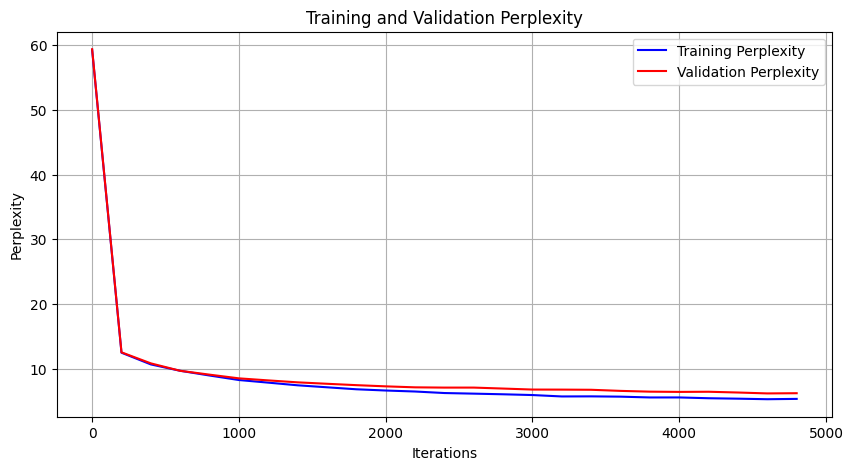

In [18]:
# Train model

iterations = np.empty(int(max_iters/eval_iters))
iterations[:] = np.nan
train_loss = np.empty(int(max_iters/eval_iters))
train_loss[:] = np.nan
val_loss = np.empty(int(max_iters/eval_iters))
val_loss[:] = np.nan

for i in range(max_iters):
    train_one_batch(model, optimizer)
    if i % eval_iters == 0:
        out = estimate_loss()
        iterations[int(i/eval_iters)] = i
        train_loss[int(i/eval_iters)] = torch.exp(out['train'])
        val_loss[int(i/eval_iters)] = torch.exp(out['val'])
        print(f"First {i} batches: training perplexity: {torch.exp(out['train']):.3f}, validation perplexity: {torch.exp(out['val']):.3f}")
        
# Visualize results
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_loss, label='Training Perplexity', color='blue')
plt.plot(iterations, val_loss, label='Validation Perplexity', color='red')
plt.title('Training and Validation Perplexity')
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# Output some text

model.eval()
prompt = "Hello, my name is"
max_new_tokens = 100
ix = torch.tensor([encode(prompt)], dtype=torch.long)
X =  ix.to('cuda')
output = model.generate(X, max_new_tokens)
[output] = output.tolist()
response = decode(output)

In [59]:
print(response)

Hello, my name is lip you sucwured no craw out speakless king not have wretch.

BENVINCLIV:
Wout if fair; you confore


#### Change hyperparameters and re-train model

Change size of embedding

In [63]:
n_embd = 128

model = BigramLanguageModel()
model.to('cuda')
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

First 0 batches: training perplexity: 48.109, validation perplexity: 48.645
First 200 batches: training perplexity: 10.769, validation perplexity: 10.682
First 400 batches: training perplexity: 8.697, validation perplexity: 8.949
First 600 batches: training perplexity: 7.773, validation perplexity: 8.210
First 800 batches: training perplexity: 7.123, validation perplexity: 7.757
First 1000 batches: training perplexity: 6.525, validation perplexity: 7.212
First 1200 batches: training perplexity: 6.214, validation perplexity: 6.988
First 1400 batches: training perplexity: 5.924, validation perplexity: 6.751
First 1600 batches: training perplexity: 5.699, validation perplexity: 6.485
First 1800 batches: training perplexity: 5.536, validation perplexity: 6.386
First 2000 batches: training perplexity: 5.402, validation perplexity: 6.246
First 2200 batches: training perplexity: 5.354, validation perplexity: 6.176
First 2400 batches: training perplexity: 5.249, validation perplexity: 6.176
Fi

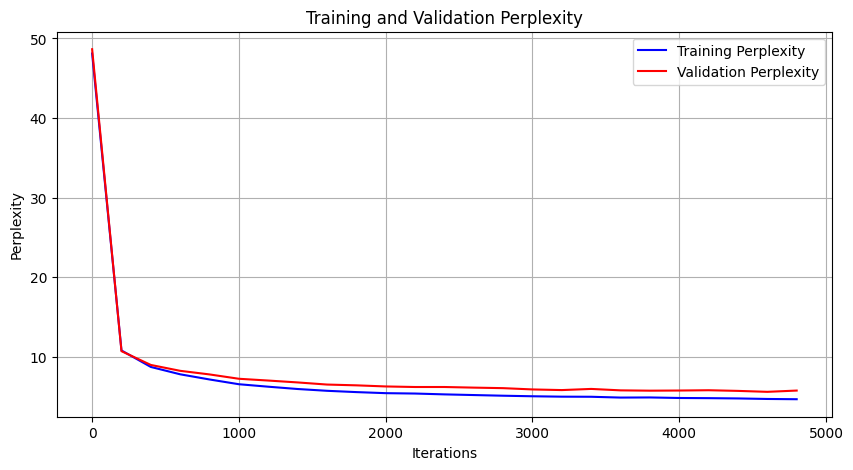

In [64]:
# Train model

iterations = np.empty(int(max_iters/eval_iters))
iterations[:] = np.nan
train_loss = np.empty(int(max_iters/eval_iters))
train_loss[:] = np.nan
val_loss = np.empty(int(max_iters/eval_iters))
val_loss[:] = np.nan

for i in range(max_iters):
    train_one_batch(model, optimizer)
    if i % eval_iters == 0:
        out = estimate_loss()
        iterations[int(i/eval_iters)] = i
        train_loss[int(i/eval_iters)] = torch.exp(out['train'])
        val_loss[int(i/eval_iters)] = torch.exp(out['val'])
        print(f"First {i} batches: training perplexity: {torch.exp(out['train']):.3f}, validation perplexity: {torch.exp(out['val']):.3f}")
        
# Visualize results
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_loss, label='Training Perplexity', color='blue')
plt.plot(iterations, val_loss, label='Validation Perplexity', color='red')
plt.title('Training and Validation Perplexity')
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Output some text

model.eval()
prompt = "Hello, my name is"
max_new_tokens = 100
ix = torch.tensor([encode(prompt)], dtype=torch.long)
X =  ix.to('cuda')
output = model.generate(X, max_new_tokens)
[output] = output.tolist()
response = decode(output)
print(response)

Hello, my name is Trutal, it we seals, I hullnno;
Could not take, do this fland, and that have warwiced, master injur


Change number of heads

In [66]:
n_head = 8

model = BigramLanguageModel()
model.to('cuda')
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

First 0 batches: training perplexity: 49.166, validation perplexity: 49.458
First 200 batches: training perplexity: 11.052, validation perplexity: 11.052
First 400 batches: training perplexity: 9.281, validation perplexity: 9.557
First 600 batches: training perplexity: 8.125, validation perplexity: 8.451
First 800 batches: training perplexity: 7.296, validation perplexity: 7.916
First 1000 batches: training perplexity: 6.760, validation perplexity: 7.361
First 1200 batches: training perplexity: 6.452, validation perplexity: 7.132
First 1400 batches: training perplexity: 6.200, validation perplexity: 6.904
First 1600 batches: training perplexity: 5.991, validation perplexity: 6.768
First 1800 batches: training perplexity: 5.771, validation perplexity: 6.610
First 2000 batches: training perplexity: 5.551, validation perplexity: 6.442
First 2200 batches: training perplexity: 5.495, validation perplexity: 6.440
First 2400 batches: training perplexity: 5.382, validation perplexity: 6.218
Fi

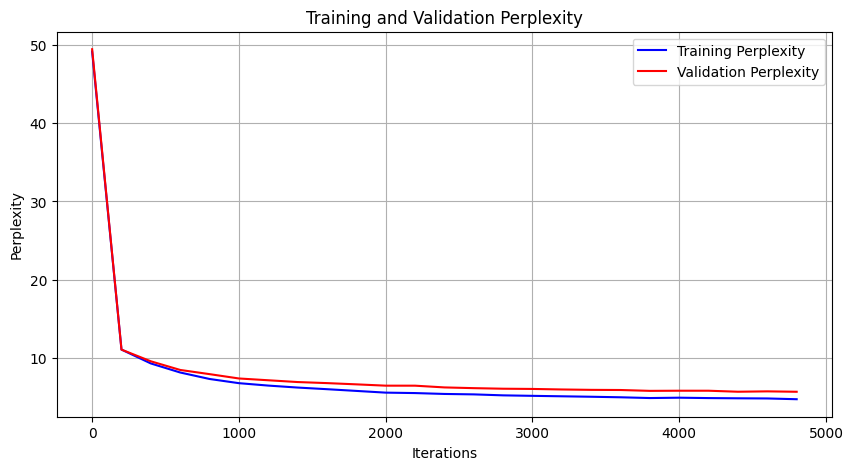

In [67]:
# Train model

iterations = np.empty(int(max_iters/eval_iters))
iterations[:] = np.nan
train_loss = np.empty(int(max_iters/eval_iters))
train_loss[:] = np.nan
val_loss = np.empty(int(max_iters/eval_iters))
val_loss[:] = np.nan

for i in range(max_iters):
    train_one_batch(model, optimizer)
    if i % eval_iters == 0:
        out = estimate_loss()
        iterations[int(i/eval_iters)] = i
        train_loss[int(i/eval_iters)] = torch.exp(out['train'])
        val_loss[int(i/eval_iters)] = torch.exp(out['val'])
        print(f"First {i} batches: training perplexity: {torch.exp(out['train']):.3f}, validation perplexity: {torch.exp(out['val']):.3f}")
        
# Visualize results
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_loss, label='Training Perplexity', color='blue')
plt.plot(iterations, val_loss, label='Validation Perplexity', color='red')
plt.title('Training and Validation Perplexity')
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# Output some text

model.eval()
prompt = "Hello, my name is"
max_new_tokens = 100
ix = torch.tensor([encode(prompt)], dtype=torch.long)
X =  ix.to('cuda')
output = model.generate(X, max_new_tokens)
[output] = output.tolist()
response = decode(output)
print(response)

Hello, my name is wite wereing years officers,
How words, child friend! all be tI have a cause o'er-love be any inkee


Increase the number of decoder blocks

In [69]:
n_layer = 8

model = BigramLanguageModel()
model.to('cuda')
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

First 0 batches: training perplexity: 39.619, validation perplexity: 40.505
First 200 batches: training perplexity: 11.009, validation perplexity: 11.302
First 400 batches: training perplexity: 9.303, validation perplexity: 9.530
First 600 batches: training perplexity: 7.939, validation perplexity: 8.116
First 800 batches: training perplexity: 7.129, validation perplexity: 7.664
First 1000 batches: training perplexity: 6.556, validation perplexity: 7.178
First 1200 batches: training perplexity: 6.239, validation perplexity: 6.943
First 1400 batches: training perplexity: 5.927, validation perplexity: 6.751
First 1600 batches: training perplexity: 5.693, validation perplexity: 6.481
First 1800 batches: training perplexity: 5.553, validation perplexity: 6.468
First 2000 batches: training perplexity: 5.414, validation perplexity: 6.341
First 2200 batches: training perplexity: 5.257, validation perplexity: 6.270
First 2400 batches: training perplexity: 5.167, validation perplexity: 6.187
Fi

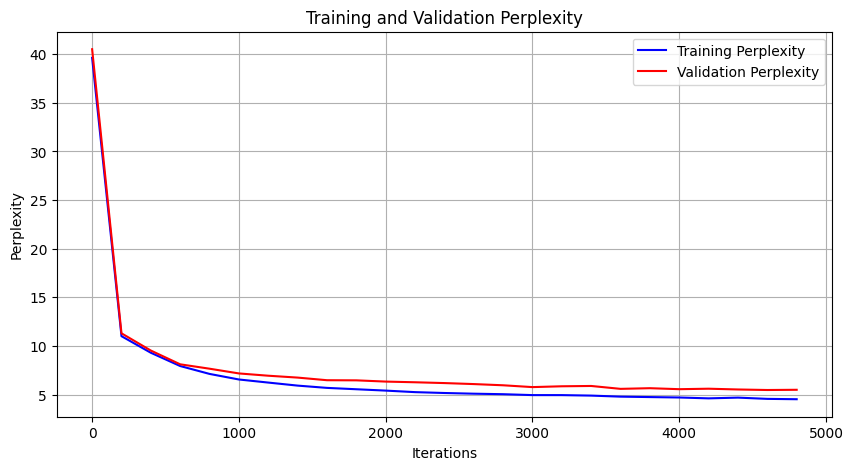

In [70]:
# Train model

iterations = np.empty(int(max_iters/eval_iters))
iterations[:] = np.nan
train_loss = np.empty(int(max_iters/eval_iters))
train_loss[:] = np.nan
val_loss = np.empty(int(max_iters/eval_iters))
val_loss[:] = np.nan

for i in range(max_iters):
    train_one_batch(model, optimizer)
    if i % eval_iters == 0:
        out = estimate_loss()
        iterations[int(i/eval_iters)] = i
        train_loss[int(i/eval_iters)] = torch.exp(out['train'])
        val_loss[int(i/eval_iters)] = torch.exp(out['val'])
        print(f"First {i} batches: training perplexity: {torch.exp(out['train']):.3f}, validation perplexity: {torch.exp(out['val']):.3f}")
        
# Visualize results
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_loss, label='Training Perplexity', color='blue')
plt.plot(iterations, val_loss, label='Validation Perplexity', color='red')
plt.title('Training and Validation Perplexity')
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Output some text

model.eval()
prompt = "Hello, my name is"
max_new_tokens = 100
ix = torch.tensor([encode(prompt)], dtype=torch.long)
X =  ix.to('cuda')
output = model.generate(X, max_new_tokens)
[output] = output.tolist()
response = decode(output)
print(response)

Hello, my name is my lament tell ten thing brother to-nigw.

HENRY VI:
tha doth adment, we thank the lands!
And colit


Simultaneously increase the number of heads and the number of decoder blocks:

In [72]:
n_head = 8
n_layer = 8

model = BigramLanguageModel()
model.to('cuda')
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

First 0 batches: training perplexity: 41.698, validation perplexity: 42.393
First 200 batches: training perplexity: 11.059, validation perplexity: 11.008
First 400 batches: training perplexity: 8.993, validation perplexity: 9.227
First 600 batches: training perplexity: 7.793, validation perplexity: 8.375
First 800 batches: training perplexity: 7.075, validation perplexity: 7.552
First 1000 batches: training perplexity: 6.652, validation perplexity: 7.376
First 1200 batches: training perplexity: 6.206, validation perplexity: 6.940
First 1400 batches: training perplexity: 5.921, validation perplexity: 6.693
First 1600 batches: training perplexity: 5.725, validation perplexity: 6.699
First 1800 batches: training perplexity: 5.573, validation perplexity: 6.456
First 2000 batches: training perplexity: 5.485, validation perplexity: 6.215
First 2200 batches: training perplexity: 5.284, validation perplexity: 6.121
First 2400 batches: training perplexity: 5.218, validation perplexity: 6.026
Fi

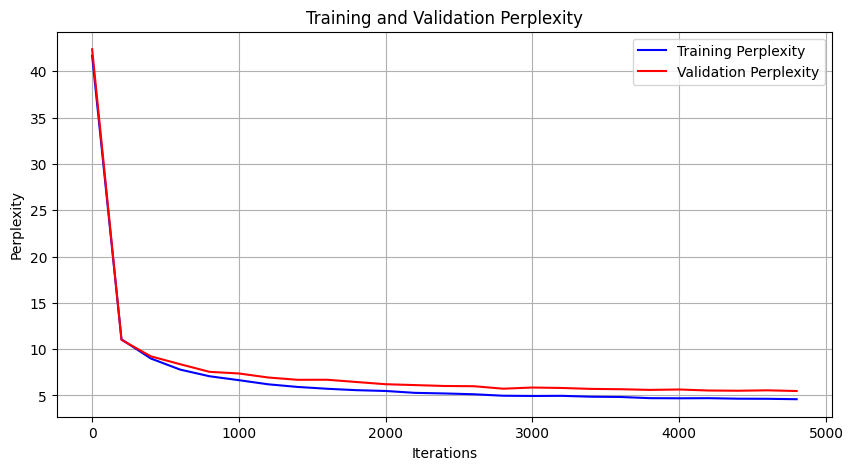

In [73]:
# Train model

iterations = np.empty(int(max_iters/eval_iters))
iterations[:] = np.nan
train_loss = np.empty(int(max_iters/eval_iters))
train_loss[:] = np.nan
val_loss = np.empty(int(max_iters/eval_iters))
val_loss[:] = np.nan

for i in range(max_iters):
    train_one_batch(model, optimizer)
    if i % eval_iters == 0:
        out = estimate_loss()
        iterations[int(i/eval_iters)] = i
        train_loss[int(i/eval_iters)] = torch.exp(out['train'])
        val_loss[int(i/eval_iters)] = torch.exp(out['val'])
        print(f"First {i} batches: training perplexity: {torch.exp(out['train']):.3f}, validation perplexity: {torch.exp(out['val']):.3f}")
        
# Visualize results
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_loss, label='Training Perplexity', color='blue')
plt.plot(iterations, val_loss, label='Validation Perplexity', color='red')
plt.title('Training and Validation Perplexity')
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Output some text

model.eval()
prompt = "Hello, my name is"
max_new_tokens = 100
ix = torch.tensor([encode(prompt)], dtype=torch.long)
X =  ix.to('cuda')
output = model.generate(X, max_new_tokens)
[output] = output.tolist()
response = decode(output)
print(response)

Hello, my name is teaches;
He friend crought?

Second Kingbolant:
By the joyques, Watchmond Mybract thy begrea
Good v


Increasing any of the three hyperparameters lead to lower perplexity on the validation set, with the number of heads and number of decoder blocks resulting in slightly larger improvements. The training time increases notably as the number of model paramters grows. None of the generated texts make sense, and only some of the words generated are real words.